# NETFLIX STOCK ANALYSIS 


## # Objectives 

1) Volume of stock traded

2) Netflix stock price- high, open, close 

3) Netflix stock price- day, month, year wise 

4) Top 5 dates- with highest stock price 

5) Top 5 dates- with lowest stock price


In [2]:
# importing libraries 

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import date 

In [3]:
# loading the dataset 

df=pd.read_csv(r"C:\Users\Poorvi Asthana\Desktop\Jupyter Files\Data Analytics previous files\Projects\Datasets\Netflix.csv")
df 

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-05-2002,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,24-05-2002,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,28-05-2002,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,29-05-2002,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,30-05-2002,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5039,27-05-2022,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,31-05-2022,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,01-06-2022,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,02-06-2022,192.020004,205.470001,191.720001,205.089996,205.089996,9623100


### (I) Statistical analysis of data

In [7]:
df.describe () 

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


### II) Data cleaning 

In [4]:
df.isnull().sum() 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### # no null values 

### III) Data visualization 

In [5]:
# global configuration of plots 

sns.set(rc={'figure.figsize' : (10,5)})  

In [8]:
# modifying date field to 'datetime' and swapping with the index

# 'datetime' format 
df['Date']= pd.to_datetime(df['Date'], dayfirst=True) 

# changing the index 
df= df.set_index('Date')

# visualizing first five records 
df.head()  

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


# # Obj. I: Volume of stock traded 

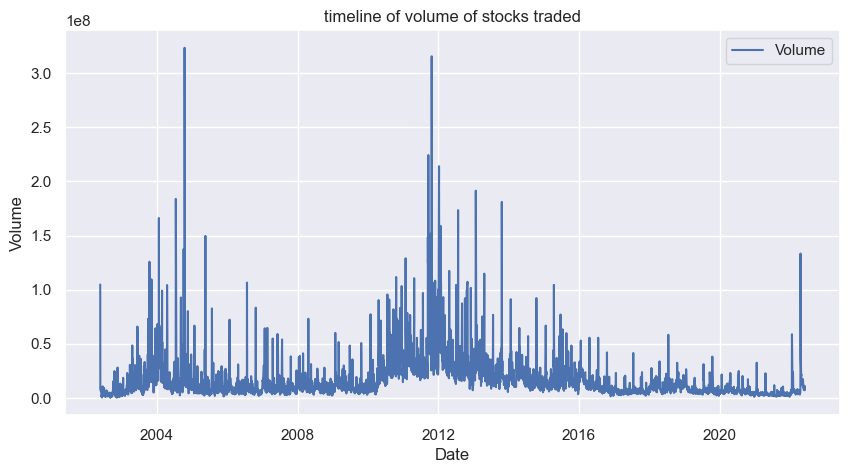

In [9]:
sns.lineplot(df, x=df.index, y='Volume', label='Volume')

plt.title('timeline of volume of stocks traded')
plt.show()

# # Obj. II: Netflix stock price- high, open, close 

### (a) lineplot() 

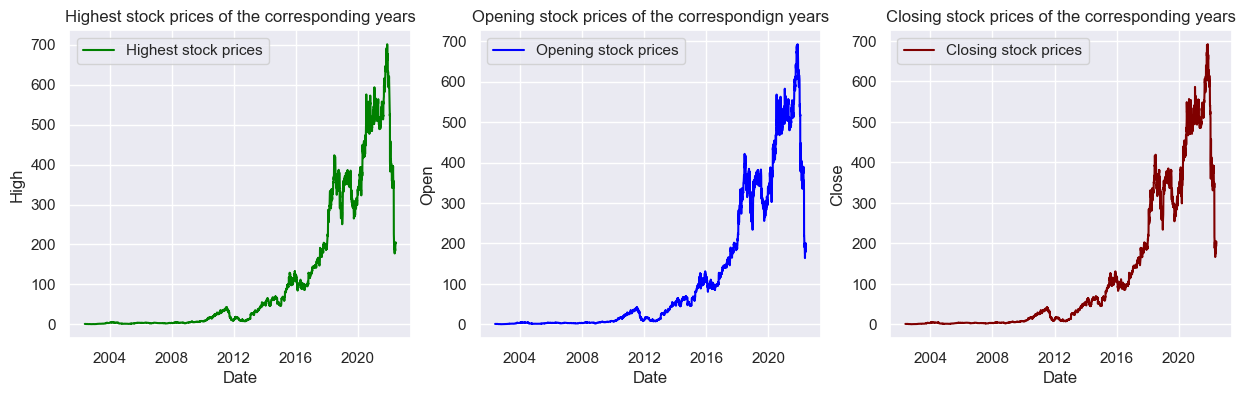

In [10]:
plt.figure(figsize= (15,4)) # without this the graphs are highly overlapped -- > 15 being the minimal width for clear separation 
 

plt.subplot(1,3,1)
sns.lineplot(df, x=df.index, y='High', label='Highest stock prices', color='green')
plt.title('Highest stock prices of the corresponding years') 


plt.subplot(1,3,2)
sns.lineplot(df,x=df.index, y='Open', label='Opening stock prices', color='blue')
plt.title('Opening stock prices of the correspondign years')


plt.subplot(1,3,3)
sns.lineplot(df,x=df.index, y='Close', label= 'Closing stock prices', color='maroon')
plt.title('Closing stock prices of the corresponding years')


plt.show() 

### (b) plot() 

<Axes: title={'center': 'Netflix stock prices'}, xlabel='Date'>

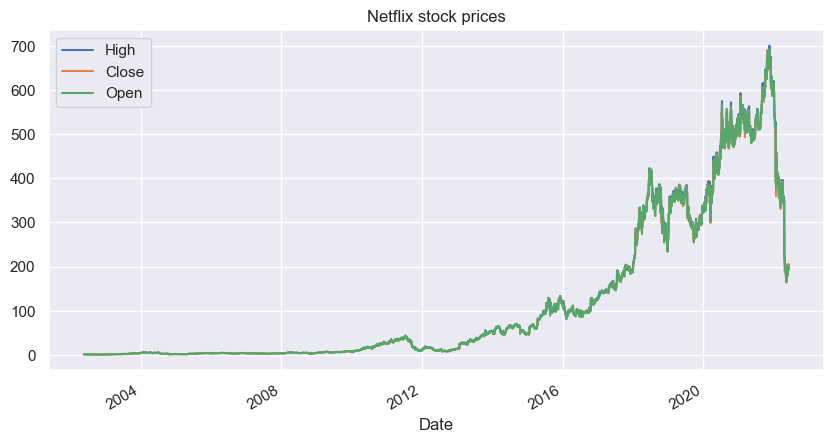

In [11]:
df.plot(y=['High','Close','Open'], title= 'Netflix stock prices')




#### --> 'Highest' & 'Closing' prices can be seen as blue & orange points, respectively, clustered mostly at year 2020 and after it.


#### -->  And are highly overlapped with the Opening prices  

# # Obj. III: Netflix stock price - day, month, yearwise   

In [18]:
plt.style.use('dark_background') 

<Axes: xlabel='Years'>

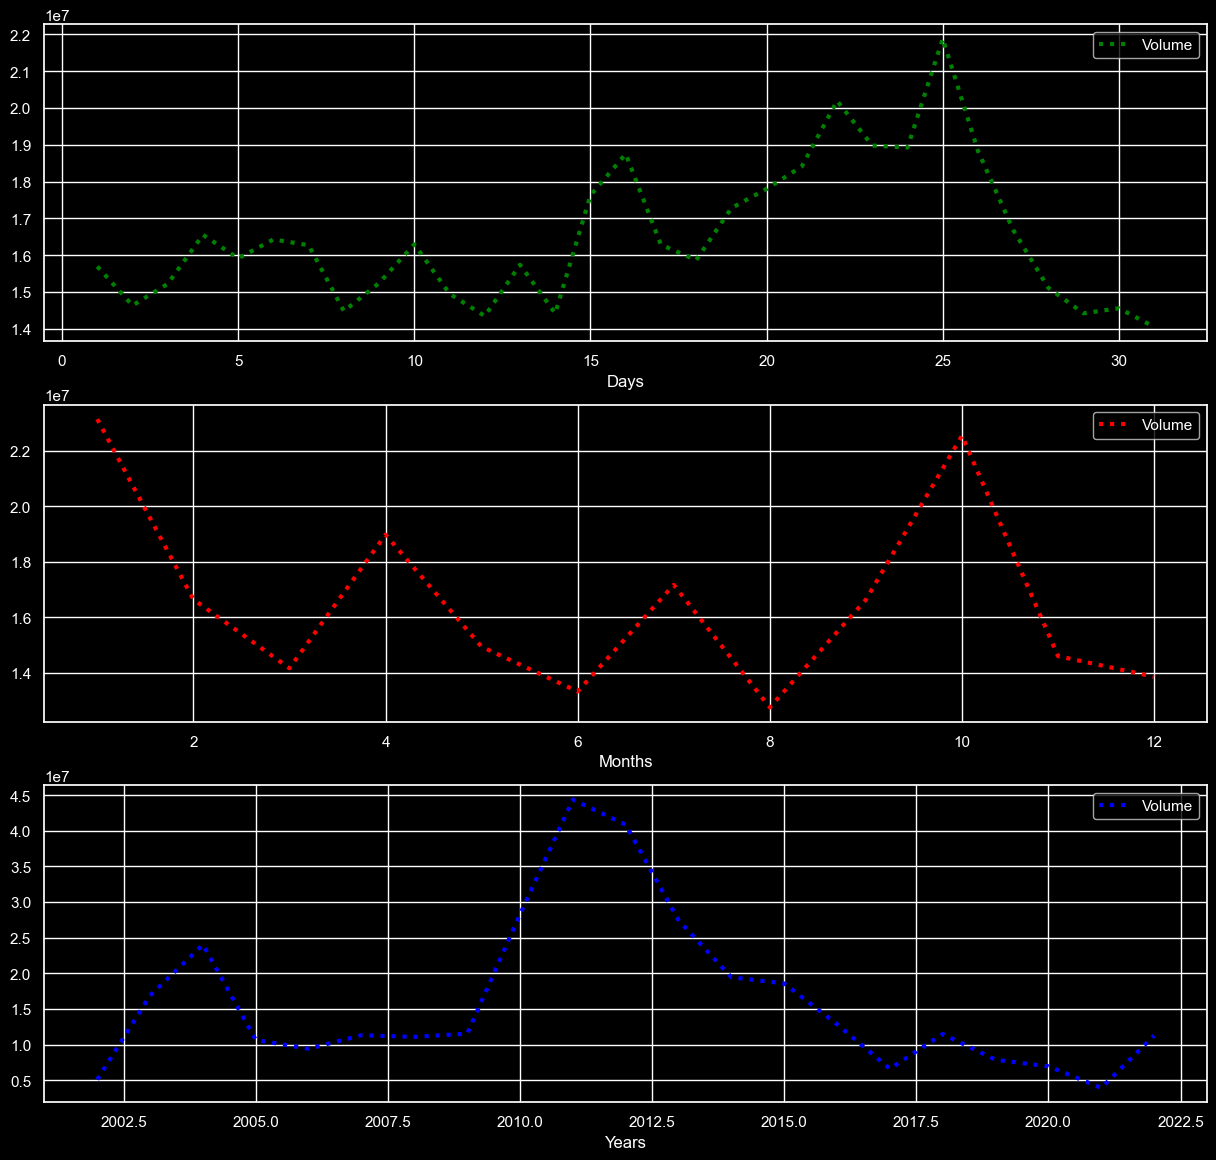

In [20]:
# creating the grids for three individual graphs 

fig, (ax1, ax2, ax3)= plt.subplots(3, figsize=(15,14)) #globally created for all three subplots 


# plotting for 'days' 
df.groupby(df.index.day).mean().plot(y= 'Volume', 
                                     ax=ax1, 
                                     xlabel= 'Days', 
                                     color='green', 
                                     linewidth= 3, 
                                     linestyle='dotted'
                                    )


# plotting for 'months'
df.groupby(df.index.month).mean().plot(y='Volume', 
                                       ax=ax2, 
                                       xlabel='Months', 
                                       color='red', 
                                       linewidth=3, 
                                       linestyle= 'dotted'
                                      ) 


#plotting for 'years'
df.groupby(df.index.year).mean().plot(y= 'Volume', 
                                      ax=ax3, 
                                      xlabel= 'Years', 
                                      color='blue', 
                                      linewidth= 3, 
                                      linestyle= 'dotted'
                                     )


# # Obj. IV: Top 5 dates with highest stock price

In [22]:
# sorting the first five dates for highest prices 

high_sort= df.sort_values(by=['High'], ascending=False)
top_5= high_sort.head()
top_5[['High']]

,High
Date,
2021-11-17,700.989990
2021-11-19,694.159973
2021-11-18,691.739990
2021-10-29,690.969971
2021-11-01,689.969971


#### (a) line chart 

Text(0.5, 1.0, 'top 5 dates with highest stock price')

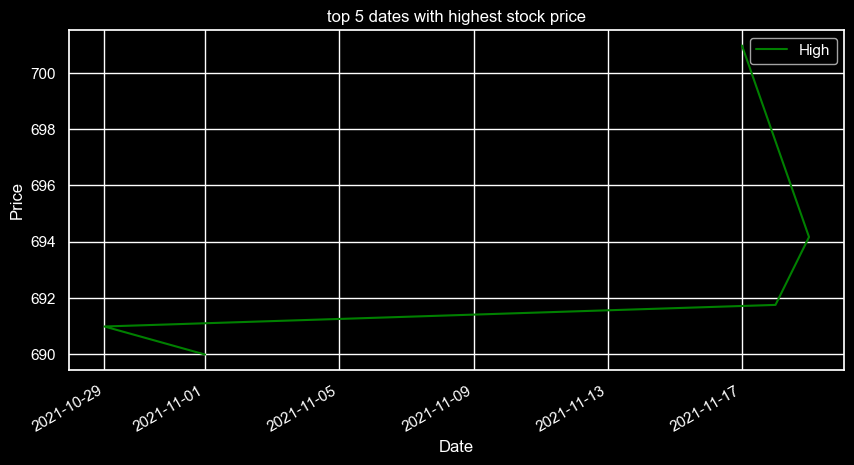

In [25]:
# line chart 

top_5.plot(y='High', xlabel='Date', ylabel='Price', color= 'green') 
plt.title('top 5 dates with highest stock price')
#plt.show() 

### (b) column chart 

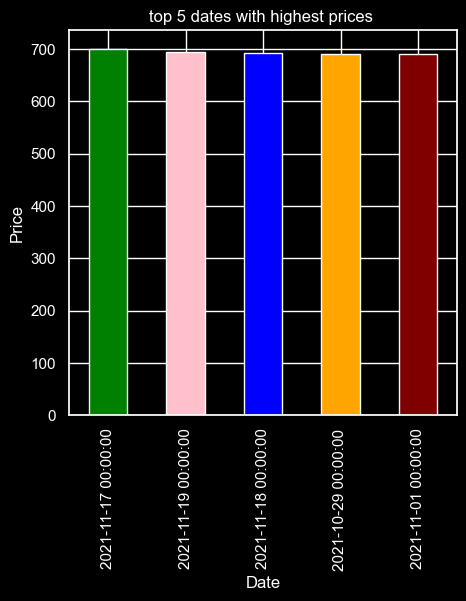

In [26]:
colors=['green', 'pink', 'blue', 'orange', 'maroon']
top_5.plot(y='High', kind='bar', xlabel='Date', ylabel='Price', title= 'top 5 dates with highest prices ', figsize=(5,5), legend=False, color= colors) # other parameters of plot() in pandas
plt.show() 

# # Obj. V: Top 5 dates with lowest stock prices


In [29]:
# sorting the dates for lowest stock price value

low_sort= df.sort_values(by=['Low'], ascending=True)
top5= low_sort.head()
top5[['Low']]

,Low
Date,
2002-10-10,0.346429
2002-10-09,0.347143
2002-10-07,0.382143
2002-10-08,0.390714
2002-10-16,0.442857


In [ ]:
### (a) line chart 

<Axes: title={'center': 'Top 5 dates with lowest stock prices '}, xlabel='Dates', ylabel='Lowest stock prices'>

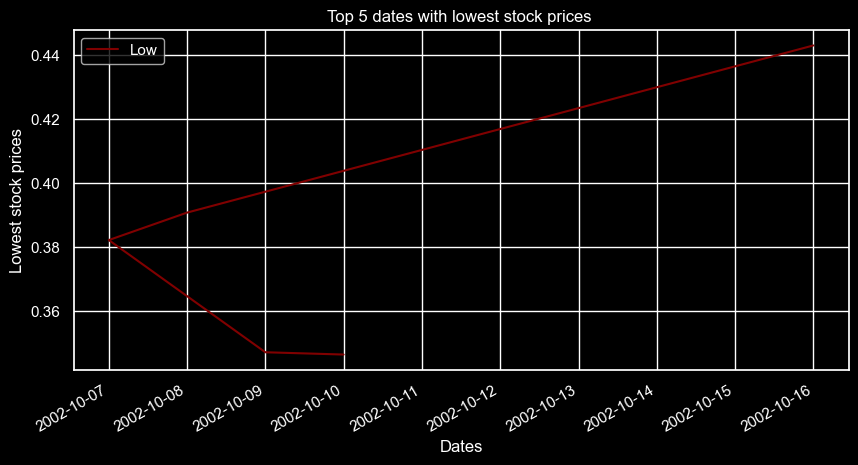

In [30]:
top5.plot(y='Low', xlabel='Dates', ylabel= 'Lowest stock prices', title= 'Top 5 dates with lowest stock prices ', color='maroon')

### (b) column chart 

<Axes: title={'center': 'Top 5 dates with lowest stock prices'}, xlabel='Date', ylabel='Price'>

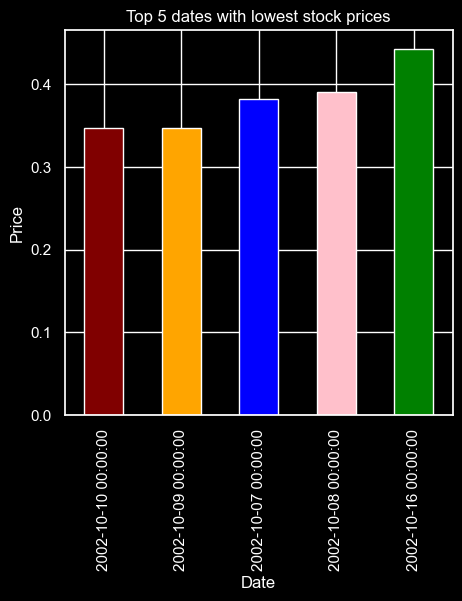

In [31]:
col= ['maroon', 'orange', 'blue', 'pink', 'green']

top5.plot(y='Low', kind='bar', xlabel='Date', ylabel='Price', title= 'Top 5 dates with lowest stock prices', 
          figsize=(5,5), 
          legend= False,
          color= col
         
         )


## # combining IV & V for visualization of high & low stock prices for all the dates 


<Axes: xlabel='Date', ylabel='Low'>

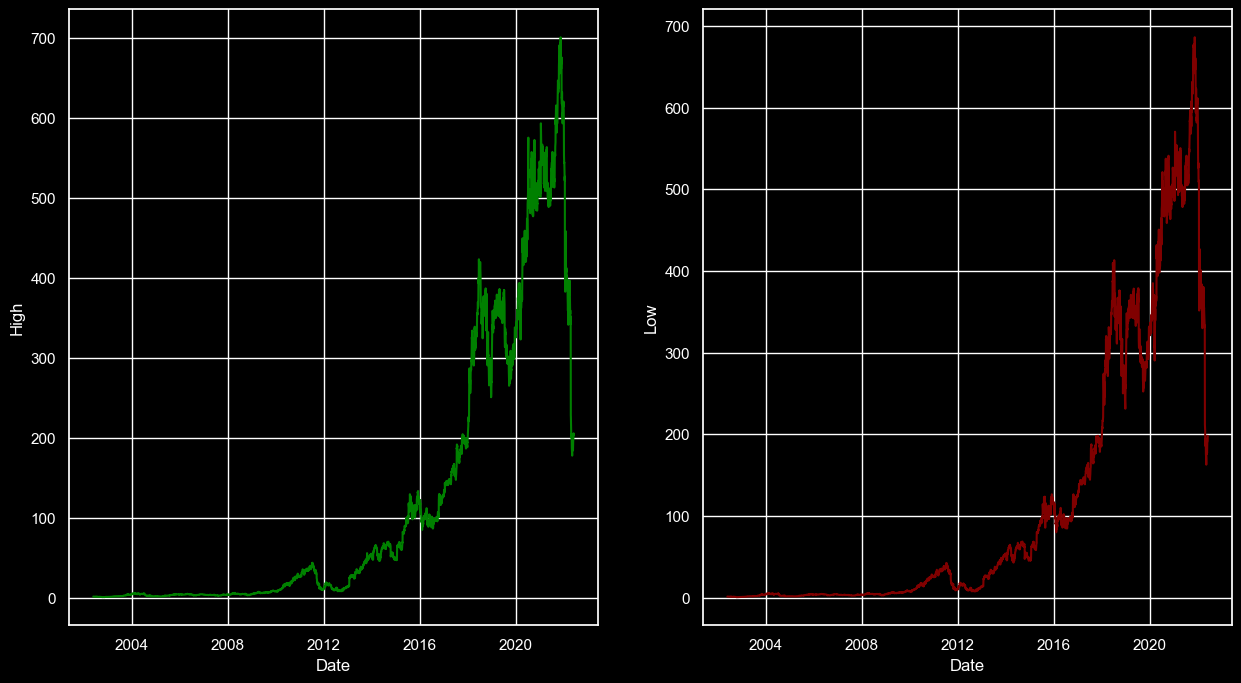

In [33]:
fg, axes=  plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(15,8))

# plotting for high prices
sns.lineplot(x=df.index, y=df['High'], ax=axes[0], color='green') 

#plotting for low prices
sns.lineplot(x=df.index, y=df['Low'], ax=axes[1], color='maroon')